# _Bike Sharing_

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

-----------------------------------------------------------------------------------------

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error

from statsmodels.api import OLS,add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading and inspecting dataset

In [2]:
#Importing dataset
##From the columns description file, we see that 'dteday' is a datetime column.
df = pd.read_csv('day.csv', parse_dates=['dteday'])

In [3]:
#Inspecting dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


`cnt` is our target/dependant variable.

In [4]:
#Checking no.of rows and columns in dataset
df.shape

(730, 16)

In [5]:
#Information of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
#Null value check
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No __Null__ values treatment required since there are no __Null__ entries.

In [7]:
#Description of columns with numerical values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Checking unique values in categorical columns
categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for i in categorical:
    print('Categories of',i)
    print(df[i].unique(),'\n')

Categories of season
[1 2 3 4] 

Categories of yr
[0 1] 

Categories of mnth
[ 1  2  3  4  5  6  7  8  9 10 11 12] 

Categories of holiday
[0 1] 

Categories of weekday
[1 2 3 4 5 6 0] 

Categories of workingday
[1 0] 

Categories of weathersit
[2 1 3] 



## Data cleaning

We will first perform some initial data cleaning for an efficient exploratory data analysis. 

We will start by dropping the unnecessary variables:
- `instant`: We can drop this variables since it __acts as an identifier__, which doesnt bring any meaning to our analysis or model.


- `dteday`: Instead of a datetime format date, we have __other variables giving us better interpretation__ (`season`,`yr`,`mnth`,`weekday`,`workingday`,`holiday`)


- `casual` and `registered`: Since our __target variable is a sum of these 2 variables__, dropping them is imperative and will help us avoid bias.


- Dropping duplicated rows (if any)

In [9]:
#Dropping unnecessary columns
df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

#Inspecting dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


We need to convert categorical columns datatype to __`category`__. 
- We will do this by mapping the numerical values in categorical columns to their true meaning (ex: _6_ in `weekday` will be written as _sunday_, etc.)
- For binary categories we will leave them as is and just convert their datatypes.

#### Mapping Categorical Values

In the below code-blocks, we will:
1. Map numerical values to their respective categories as per the data dictionary.
2. Change the datatype of the column.
3. Validate the changes of the values.

In [11]:
#season
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['season'] = df['season'].astype('category')
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
#mnth
df['mnth'] = df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df['mnth'] = df['mnth'].astype('category')
df['mnth'].value_counts()

oct    62
may    62
mar    62
jul    62
jan    62
dec    62
aug    62
sep    60
nov    60
jun    60
apr    60
feb    56
Name: mnth, dtype: int64

In [13]:
#weekday
df['weekday'] = df['weekday'].map({0:'sunday',1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})
df['weekday'] = df['weekday'].astype('category')
df['weekday'].value_counts()

tuesday      105
monday       105
wednesday    104
thursday     104
sunday       104
saturday     104
friday       104
Name: weekday, dtype: int64

In [14]:
#weathersit
df['weathersit'] = df['weathersit'].map({1:'clear_cloudy',2:'mist_cloudy',3:'light_snow_rain',4:'heavy_snow_rain'})
df['weathersit'] = df['weathersit'].astype('category')
df['weathersit'].value_counts()

clear_cloudy       463
mist_cloudy        246
light_snow_rain     21
Name: weathersit, dtype: int64

In [15]:
#Converting binary categorical columns to `object` datatype
df[['yr','holiday','workingday']] = df[['yr','holiday','workingday']].astype('category')

In [16]:
## Verifying the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


In [17]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)
df.shape

(730, 12)

Now that we are done with initial cleaning, let's perform __EDA__.

## EDA

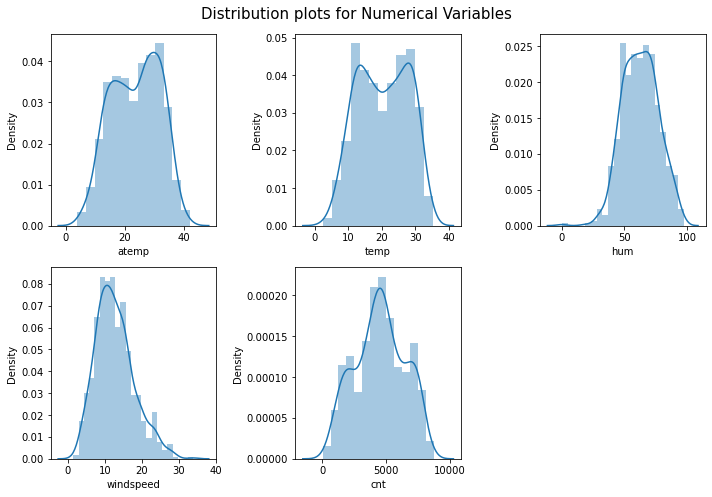

In [19]:
#Plotting distribution plots for numerical variables to get better insights
temp = 1
plt.figure(figsize=(10,7))
for i in ['atemp','temp','hum','windspeed','cnt']:
    plt.subplot(2,3,temp)
    sns.distplot(df[i])
    temp=temp+1
plt.suptitle('Distribution plots for Numerical Variables', fontsize=15)
plt.tight_layout()

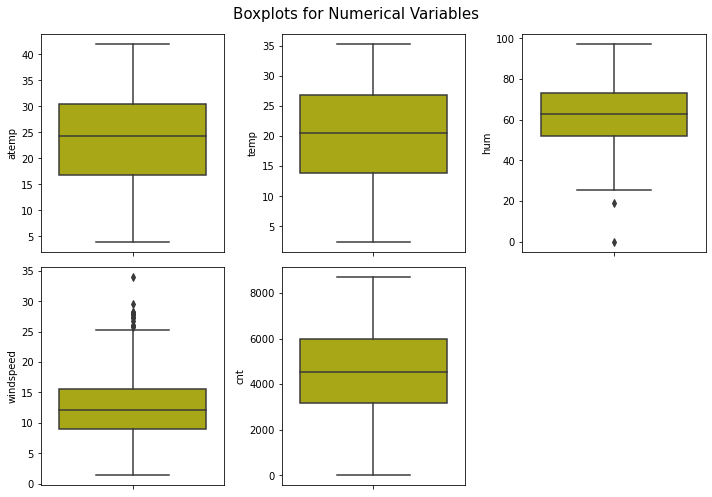

In [18]:
#Plotting boxplots for numerical variables to get better insights
temp = 1
plt.figure(figsize=(10,7))
for i in ['atemp','temp','hum','windspeed','cnt']:
    plt.subplot(2,3,temp)
    sns.boxplot(data = df, y=i, color='y')
    temp=temp+1
plt.suptitle('Boxplots for Numerical Variables', fontsize=15)
plt.tight_layout()

- We can see some outliers in `hum` and `windspeed` variables.
    - The outliers in both these variables are in the probable range and don't seem like they are ill-entered or errors.
    - To maintain the meaning of the outlier points we will not make any modifications.
    - These outlier points can't be deleted too due to less datapoints present in the data.
- `atemp` and `temp` have no outliers
- `cnt` as a target variable has a reasonable spread and has no outliers.

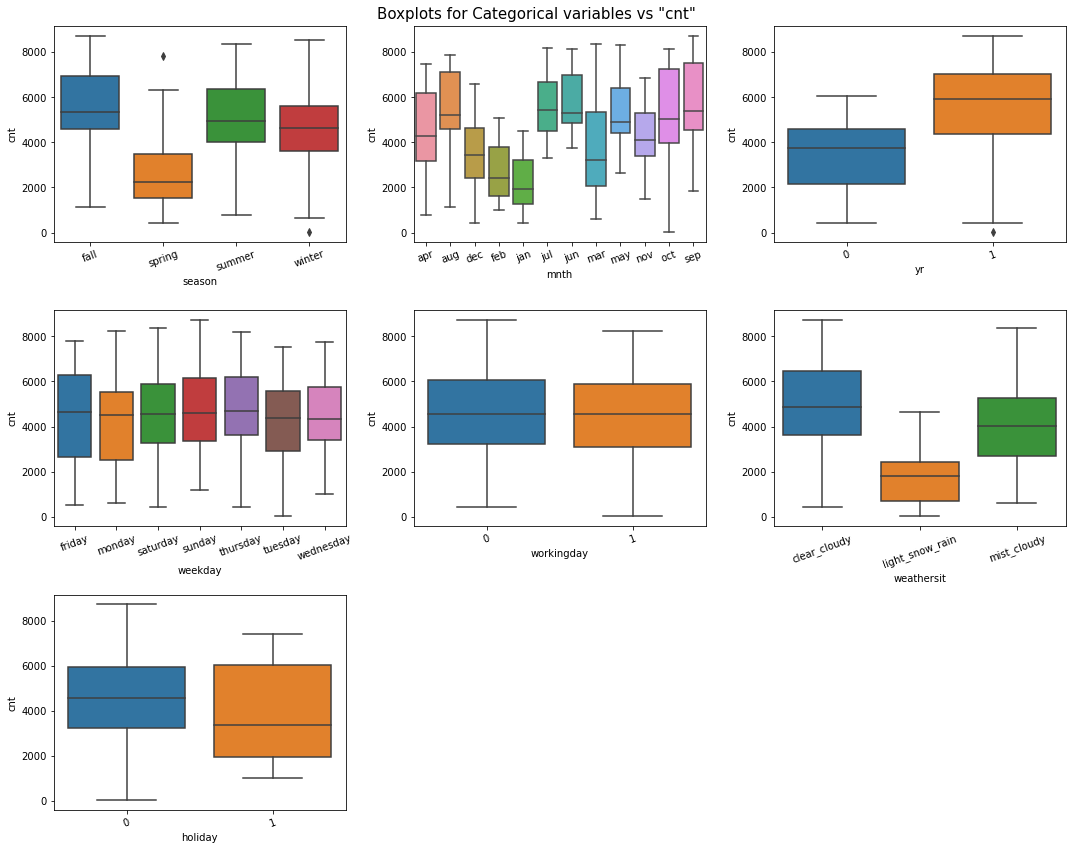

In [21]:
temp = 1
plt.figure(figsize=(15,12))
for i in ['season','mnth','yr','weekday','workingday','weathersit', 'holiday']:
    plt.subplot(3,3,temp)
    sns.boxplot(data = df, y='cnt', x=i)
    plt.xticks(rotation=20)
    temp=temp+1
plt.suptitle('Boxplots for Categorical variables vs "cnt"', fontsize=15)
plt.tight_layout()

- We can see that the highest rentals are in _fall_ season, and months falling in the _fall_ season.
- _clear_cloudy_ weather seems to have the highest values.
- Rentals are higher in the year _2019_ than _2018_.
- _friday_ seems to have highest number of rentals.
- It doesnt seem to matter if the day is working or not, sales are almost equal.
- We can also see that the median of sales is much higher on days which are not holidays.

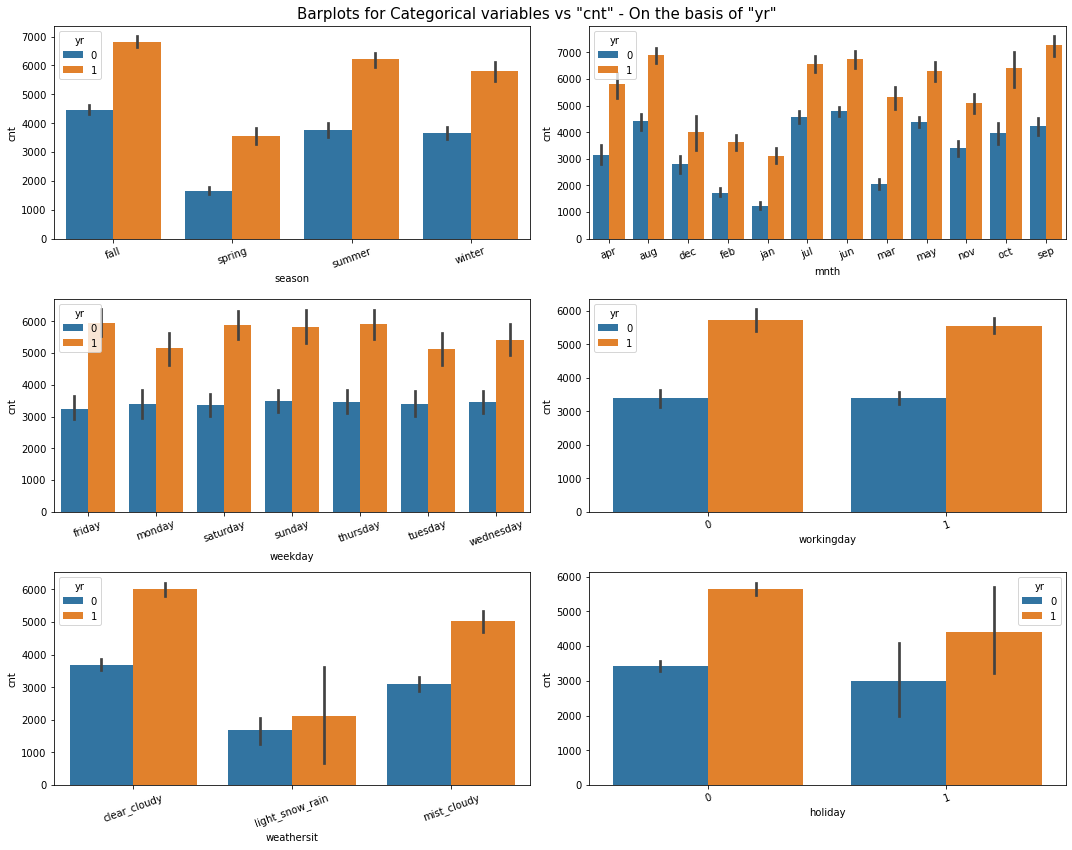

In [22]:
temp = 1
plt.figure(figsize=(15,12))
for i in ['season','mnth','weekday','workingday','weathersit', 'holiday']:
    plt.subplot(3,2,temp)
    sns.barplot(data = df, y='cnt', x=i, hue='yr')
    plt.xticks(rotation=20)
    temp=temp+1
plt.suptitle('Barplots for Categorical variables vs "cnt" - On the basis of "yr"', fontsize=15)
plt.tight_layout()

- The ratio of difference between both the years in all categories are very similar with a common pattern of 2019 having much higher sales, comapred to 2018.

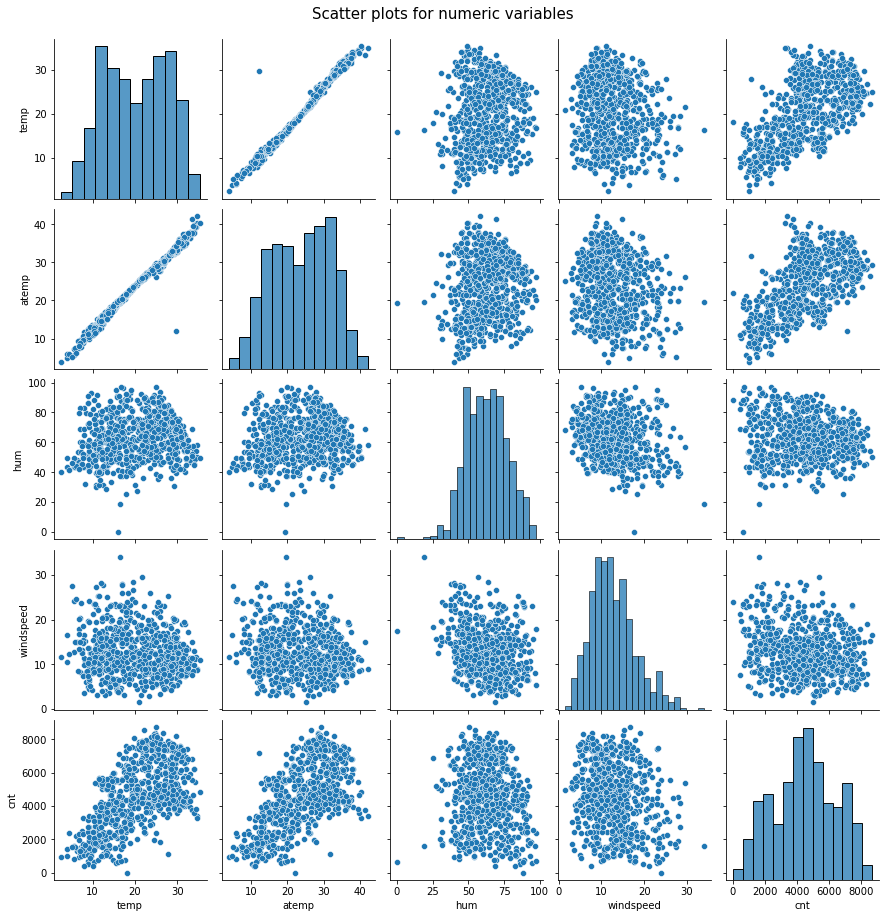

In [23]:
sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.suptitle('Scatter plots for numeric variables', fontsize=15, y=1.02)
plt.show()

- There seems to be no linear patterns as such with `cnt` variable, except with `atemp` and `temp`.
- `atemp` and `temp` are clearly highly correlated.
- No linear relationship can be spotted between rest of the independant variables.

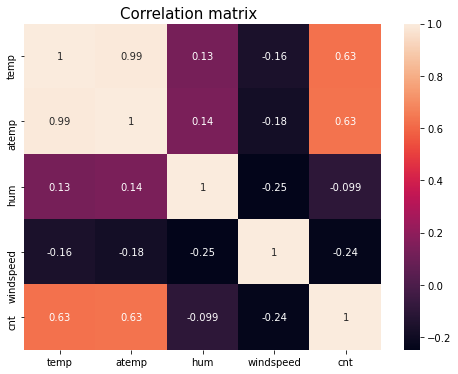

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.suptitle('Correlation matrix', fontsize=15, x=0.41, y=0.92)
plt.show()

- `atemp` and `temp` seems to be highly correlated with the dependant variable (`cnt`)
- Rest of the features don't seem to be highly correlated with the dependant variable.
- There is slight correlation between the independant variables. Doesn't seem to be too high.
- Due to the extremely high correlation between `atemp` and `temp`, we need to drop one of those variables. 
    - Since `atemp` has slightly higher correlation with other independant variables, it will be needed to drop.
    - We will keep both variables for now and not remove it. Further inspection will be done for this while model building.


Note: We will check for correlation again after creating dummies, to have a better insight while building the model.

## Data preparation

In [24]:
# Dummifying the categorical variables: season, month, weekday, weathersit
dummies = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)

#Adding the dummied columns in the dataset
df[dummies.columns] = dummies

#dropping the original columns
df.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)

#Inspecting the dataset
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Inspecting new dataset
print('Shape of dataset:',df.shape,'\n')
print('Columns of dataset:',', '.join(list(df.columns)),'\n')
df.head()

Shape of dataset: (730, 30) 

Columns of dataset: yr, holiday, workingday, temp, atemp, hum, windspeed, cnt, season_spring, season_summer, season_winter, mnth_aug, mnth_dec, mnth_feb, mnth_jan, mnth_jul, mnth_jun, mnth_mar, mnth_may, mnth_nov, mnth_oct, mnth_sep, weekday_monday, weekday_saturday, weekday_sunday, weekday_thursday, weekday_tuesday, weekday_wednesday, weathersit_light_snow_rain, weathersit_mist_cloudy 



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light_snow_rain,weathersit_mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


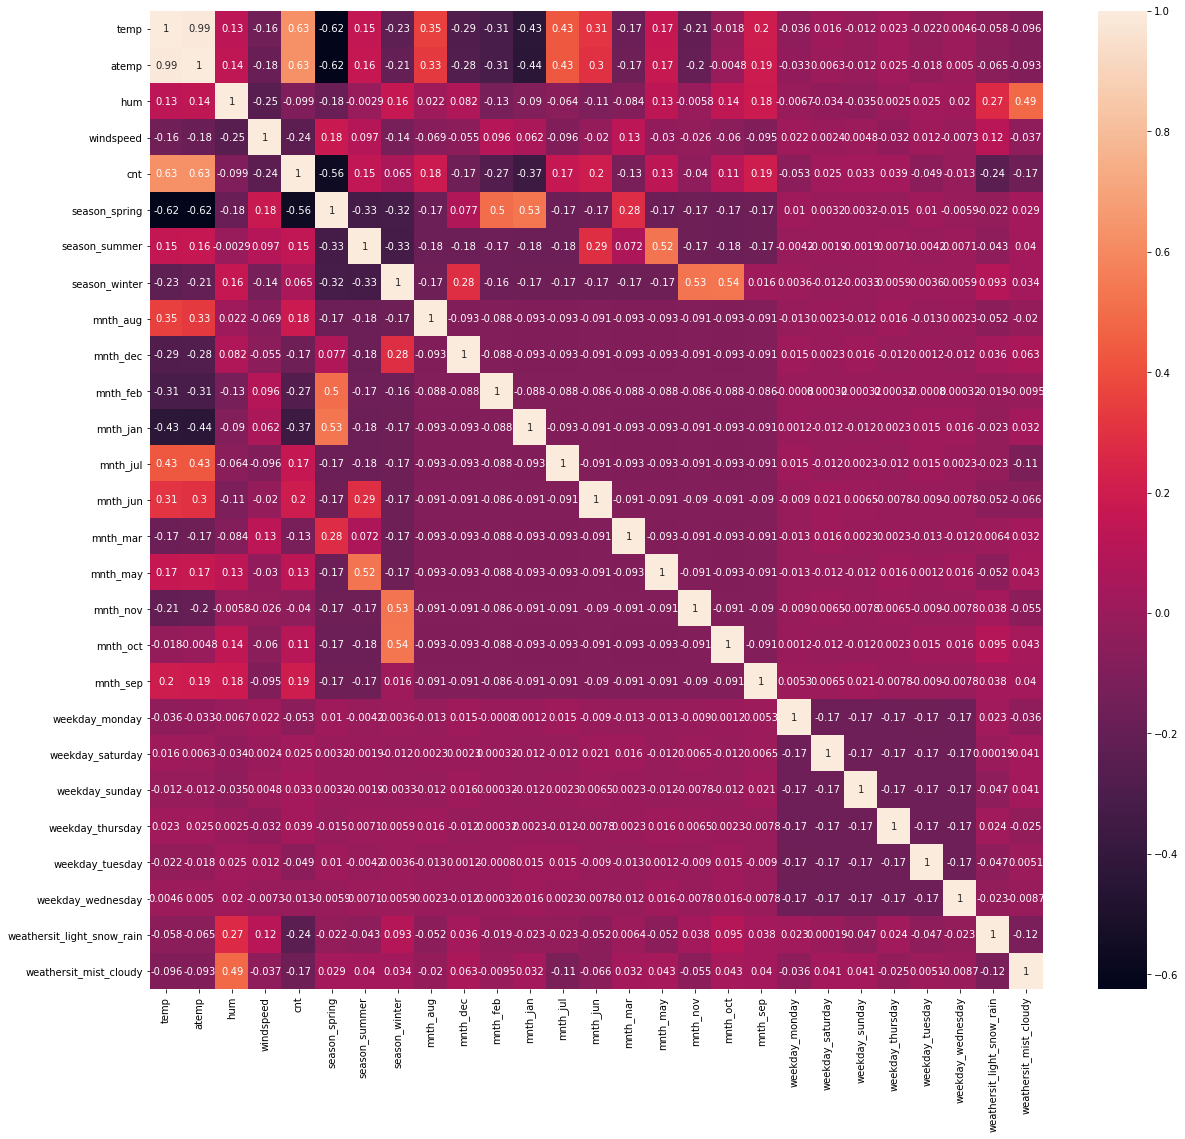

In [28]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)
plt.show()

- We can see that there is high correlation within independant variables.
- Target variable seems to have some good variables with correlation.


On the basis of above observations, this heatmap will be chcked every now and then while building the model to have a more thorough understanding.

In [29]:
#Dividing datasets into 'train' and 'test' datasets
df_train, df_test = train_test_split(df, train_size=0.7, random_state=6)

#Converting the datatypes to numeric (for model building)
df_train = df_train.astype('float')
df_test = df_test.astype('float')

print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [30]:
#Standardizing continuous values in both 'train' and 'test' datasets
##### Standardizing is prefered to maintain the meaning of the outliers #####
scaler = StandardScaler()

#Scaling columns in training set
df_train[['temp','atemp','hum','windspeed']] = scaler.fit_transform(df_train[['temp','atemp','hum','windspeed']])

#Scaling columns in testing set
df_test[['temp','atemp','hum','windspeed']] = scaler.transform(df_test[['temp','atemp','hum','windspeed']])

In [31]:
# Dividing data into X,y

#Train
X_train = df_train.drop('cnt', axis=1)
y_train = df_train['cnt']

#Test
X_test = df_test.drop('cnt',axis=1)
y_test = df_test['cnt']

## Model Building

__PS:__ Based on the comments of the creator of varaince_inflation_factor module, no constants were removed while checking the VIF.

`ref1:` https://github.com/statsmodels/statsmodels/issues/2376#issuecomment-97167385 <br>
`ref2:` https://365datascience.com/question/variance_inflation_factor-for-constants/

In [32]:
#Fitting initial model with all features
lr = LinearRegression()
lr.fit(X_train, y_train)

#Checking top 20 features with RFE
rfe = RFE(lr, 20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [33]:
#Creating a dataframe to check the rankings of the supported features
rfe_df = pd.DataFrame()

rfe_df['Features'] = X_train.columns
rfe_df['Support'] = rfe.support_
rfe_df['Ranks'] = rfe.ranking_

rfe_df.sort_values('Ranks',ascending=True)

,Features,Support,Ranks
0,yr,True,1
25,weekday_tuesday,True,1
23,weekday_sunday,True,1
22,weekday_saturday,True,1
21,weekday_monday,True,1
20,mnth_sep,True,1
19,mnth_oct,True,1
18,mnth_nov,True,1
27,weathersit_light_snow_rain,True,1
13,mnth_jan,True,1


In [34]:
#Columns to be considered
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_spring',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_tuesday',
       'weathersit_light_snow_rain', 'weathersit_mist_cloudy'],
      dtype='object')

Now that we have sorted out the important columns, we can drop the rest and continue building our model with __statsmodels__ library for better view on the statistics.

In [35]:
#Removing columns which are not useful (as per RFE)
X_train_rfe = X_train[cols]
X_train_rfe.shape

(510, 20)

In [36]:
#Creating a function to check VIF
def check_vif(X):
    #Creating a new dataframe to append
    vif_df = pd.DataFrame()
    #Getting the features from the training set and appending to the dataframe
    vif_df['Features'] = X.columns
    #Getting VIF values and appending to the dataframe
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_df.sort_values('VIF', ascending=False)

In [37]:
# Adding a constant term to the training dataset
X_train_sm = add_constant(X_train_rfe)

#Fitting the data in OLS model
lr = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.63e-173
Time:                        13:40:50   Log-Likelihood:                -4135.2
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     489   BIC:                             8401.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [38]:
#Dropping 'mnth_aug' variable based on p-value
X_train_sm.drop('mnth_aug', axis=1, inplace=True)

#Fitting the data in OLS model
lr1 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr1.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     124.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.53e-173
Time:                        13:41:27   Log-Likelihood:                -4135.9
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     490   BIC:                             8396.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [39]:
#Dropping 'mnth_oct' variable based on p-value
X_train_sm.drop('mnth_oct', axis=1, inplace=True)

#Fitting the data in OLS model
lr2 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr2.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     131.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.50e-174
Time:                        13:41:36   Log-Likelihood:                -4136.5
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     491   BIC:                             8392.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [40]:
#Dropping 'weekday_saturday' variable due to high p-value
X_train_sm.drop('weekday_saturday', axis=1, inplace=True)

#Fitting the data in OLS model
lr3 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr3.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          8.50e-175
Time:                        13:41:49   Log-Likelihood:                -4138.0
No. Observations:                 510   AIC:                             8312.
Df Residuals:                     492   BIC:                             8388.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [41]:
#Dropping 'workingday' variable based on p-value
X_train_sm.drop('workingday', axis=1, inplace=True)

#Fitting the data in OLS model
lr4 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr4.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     146.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.93e-176
Time:                        13:41:56   Log-Likelihood:                -4138.1
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     493   BIC:                             8382.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [42]:
#Dropping 'weekday_sunday' variable based on high p-value
X_train_sm.drop('weekday_sunday', axis=1, inplace=True)

#Fitting the data in OLS model
lr5 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr5.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.52e-177
Time:                        13:42:05   Log-Likelihood:                -4138.3
No. Observations:                 510   AIC:                             8309.
Df Residuals:                     494   BIC:                             8376.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [43]:
#Dropping 'holiday' variable based on high p-value
X_train_sm.drop('holiday', axis=1, inplace=True)

#Fitting the data in OLS model
lr6 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr6.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.29e-177
Time:                        13:42:13   Log-Likelihood:                -4139.2
No. Observations:                 510   AIC:                             8308.
Df Residuals:                     495   BIC:                             8372.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [44]:
#Dropping 'mnth_feb' variable based on high p-value 
#(p-value extremely close to significance value, if r2 is highly impacted the variable will be added again)
X_train_sm.drop('mnth_feb', axis=1, inplace=True)

#Fitting the data in OLS model
lr7 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr7.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          6.53e-178
Time:                        13:42:19   Log-Likelihood:                -4141.2
No. Observations:                 510   AIC:                             8310.
Df Residuals:                     496   BIC:                             8370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [45]:
#Dropping 'mnth_jan' variable based on high p-value
X_train_sm.drop('mnth_jan', axis=1, inplace=True)

#Fitting the data in OLS model
lr8 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr8.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     193.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.40e-178
Time:                        13:42:25   Log-Likelihood:                -4142.3
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     497   BIC:                             8366.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [46]:
#Dropping 'weekday_monday' variable based on very low coefficient value, 
#(will be added again if R2 shows massive difference)
X_train_sm.drop('weekday_monday', axis=1, inplace=True)

#Fitting the data in OLS model
lr9 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr9.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.19e-178
Time:                        13:42:29   Log-Likelihood:                -4144.9
No. Observations:                 510   AIC:                             8314.
Df Residuals:                     498   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
#Dropping 'weekday_tuesday' variable based on very low coefficient value, 
#(will be added again if R2 shows massive difference)
X_train_sm.drop('weekday_tuesday', axis=1, inplace=True)

#Fitting the data in OLS model
lr10 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr10.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.39e-178
Time:                        13:42:35   Log-Likelihood:                -4149.6
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     499   BIC:                             8368.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
#Dropping 'mnth_nov' variable based on very low coefficient value, 
#(will be added again if R2 shows massive difference)
X_train_sm.drop('mnth_nov', axis=1, inplace=True)

#Fitting the data in OLS model
lr11 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr11.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     247.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.83e-178
Time:                        13:42:40   Log-Likelihood:                -4152.8
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     500   BIC:                             8368.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
#Dropping 'mnth_dec' variable based on very low coefficient value, 
#(will be added again if R2 shows massive difference)
X_train_sm.drop('mnth_dec', axis=1, inplace=True)

#Fitting the data in OLS model
lr12 = OLS(y_train, X_train_sm).fit()

#Sumamry of this model
print(lr12.summary())

#VIF values
print('='*50,'\n','\t\t\tVIF Values\n','-'*50,'\n',check_vif(X_train_sm))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.45e-178
Time:                        13:42:44   Log-Likelihood:                -4155.1
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     501   BIC:                             8366.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- All the __P-values__ are less than the significance level (0.05) and __VIF-values__ are in acceptable range.
- We have reduced the complexity of the model
- Upon verification of assumptions and test results we can conclude if __`lr12`__ can be decalred as final model or not.

### Checking various assumptions

#### 1. Linear Relationship of variables

This assumption was earlier checked on the basis of pairplots of dependant vs independant variables.

#### 2. Homoscedasticity

In [50]:
# Getting predictions for train set
y_train_pred = lr12.predict(X_train_sm)

#error terms
err = y_train - y_train_pred

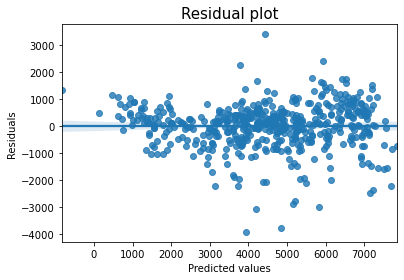

In [51]:
#Plotting a residual plot in a regression plot to check the variance of residuals
sns.regplot(x=y_train_pred, y=err)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot', fontsize=15)
plt.show()


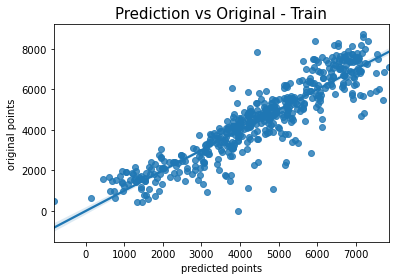

In [52]:
#Plotting predicted vs original
sns.regplot(x=y_train_pred, y=y_train)
plt.title('Prediction vs Original - Train', fontsize=15)
plt.xlabel('predicted points')
plt.ylabel('original points')
plt.show()

From the above plots we can see that homoscedasticity is more or less maintained and the assumption can be concluded to be satisfied.

#### 3. Absence of Multicollinearity

In [53]:
check_vif(X_train_sm)

,Features,VIF
0,const,5.064219
2,atemp,2.824311
3,season_spring,2.564210
4,season_winter,1.668162
5,mnth_jul,1.328905
6,mnth_sep,1.090382
7,weathersit_light_snow_rain,1.043084
8,weathersit_mist_cloudy,1.036155
1,yr,1.014975


Since all the features have VIF are in satisfactory range (excluding constant, which is to be ignored), we can safely conclude that this assumption is satisfied.

#### 4. Independance of residuals

In [55]:
lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     275.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.45e-178
Time:                        13:43:58   Log-Likelihood:                -4155.1
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     501   BIC:                             8366.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3979.5486     84.023     47.362      0.000    3814.467    4144.630
yr                          2070.9538     75.232     27.528      0.000    1923.145    2218.762
atemp                        855.4744     62.748     13.634      0.000     732.193     978.756
season_spring              -1157.8889    136.847     -8.461      0.000   -1426.754    -889.024
season_winter                294.9158    112.726      2.616      0.009      73.442     516.390
mnth_jul                    -570.6970    151.750     -3.761      0.000    -868.841    -272.553
mnth_sep                     558.3280    140.317      3.979      0.000     282.646     834.010
weathersit_light_snow_rain -2213.0744    212.435    -10.418      0.000   -2630.447   -1795.702
weathersit_mist_cloudy      -619.8132     80.276     -7.721      0.000    -777.533    -462.093
==============================================================================
Omnibus:                       86.950   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.064
Skew:                          -0.831   Prob(JB):                     1.22e-52
Kurtosis:                       5.913   Cond. No.                         7.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary results, we can see that __Durbin-Watson Test__ gives us a value close to `2`
- Acceptable range of __Durbin-Watson Test__ is `1.5` to `2.5`.
- Thus we can conclude that the residuals are independant and there exists no or extremely minimal auto-correlation

#### 5. Normality of residuals

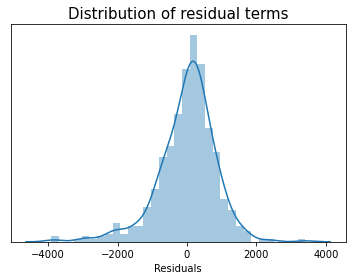

In [56]:
#Plotting the error terms' distribution
sns.distplot(err)
plt.xlabel('Residuals')
plt.ylabel('')
plt.yticks([])
plt.title('Distribution of residual terms', fontsize=15)
plt.show()

From the above plot we can conclude that the residuals have a __Normal Distribution__ and are centred around `0`. Thus satisfying the assumption.

### Calculating R2 and Adjusted-R2 for `test` set

In [57]:
# Getting predictions for test set
X_test_sm = add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]
y_test_pred = lr12.predict(X_test_sm)

#Calculating r2 and adjusted r2
test_r2 = r2_score(y_test, y_test_pred)
test_adjust_r2 =  1 - (1-test_r2)*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1)

#### Final Scores:

In [60]:
scores = pd.DataFrame({'Train':[round(lr12.rsquared*100, 1),round(lr12.rsquared_adj*100,1)],'Test':[round(test_r2*100,1),round(test_adjust_r2*100,1)]}, index = ['R-squared (%)','Adj. R-Squared (%)'])
scores

,Train,Test
R-squared (%),81.5,81.5
Adj. R-Squared (%),81.2,80.7


Looking at the final scores of both __training__ and __testing__ dataset:


- ${R}^2$ and ${Adjusted R}^2$ for __train__ and __test__ sets are pretty close
- This shows that the model is generalizing well


We can consider this as our __final model__ and continue with _providing business recommendations_.

## Business Recommendations / Final Report

The business problem was to build a model which predicts the __Rentals__ from given parameters. 

For our model, we have considered ${R}^2$ as the metric since this will give us a good idea about the models accuracy and its relative efficacy with comparison to a very basic model giving us the mean values.

In [63]:
pd.DataFrame(lr12.params, columns=['coefficients'])

,coefficients
const,3979.548633
yr,2070.953790
atemp,855.474354
season_spring,-1157.888914
season_winter,294.915784
mnth_jul,-570.697032
mnth_sep,558.328002
weathersit_light_snow_rain,-2213.074438
weathersit_mist_cloudy,-619.813209


### For our model, there were certain modifications which were done:
- __The numerical values were standardized so as to bring them on a common scale__
    - This was done to get a better and accurate understanding of most important features
    - Since no outlier analysis was done despite having outliers (due to the values being in the reasonable range), standardization would maintain the meaning of those datapoitns.
- __The categorical values were segregated based on their individual ategories and were given binary encoding (0 = False, 1 = True)__
    - This was done so as to avoid creating bias by having direct numerical encoding (where 4 would get more strength than 1)
- __Certain unnecessary columns were removed beforehand to avoid being misled and misinformed (such as `registered`,`casual`, etc.)__

The parameters importance is decided by the coefficient strength.


### The prediction of `Rentals` is affected the most by the below parameters:

__1. `weathersit_light_snow_rain`__
- This feature has a negative coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`decrease`__ by ${2213.07}$ units.
    
    
__2. `yr`__
- This feature has a positive coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`increase`__ by ${2070.95}$ units. 
    
    
__3. `season_spring`__
- This feature has a negative coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`decrease`__ by ${1157.89}$ units.


These are the 3 parameters business must be most wary of.

### Other parameters which affect the prediction of `rentals`:


__4. `atemp`__
- This feature has a positive coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`increase`__ by ${796.94}$ units.
    
    
__5. `weathersit_mist_cloudy`__
- This feature has a positive coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`decrease`__ by ${619.81}$ units.
    
    
__6. `mnth_jul`__
- This feature has a negative coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`decrease`__ by ${570.70}$ units.


__7. `mnth_sep`__
- This feature has a positive coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`increase`__ by ${558.33}$ units.
    
__8. `season_winter`__
- This feature has a positive coefficient value. 
- This indicates that a unit increase in this variable would cause the __rentals__ to __`increase`__ by ${294.92}$ units.

Assuming that all of the above parameters were to get __`0`__, we would still see ${3979.55}$ units increase in __rentals__ (derived from the `cnst` term). 

Based on all the above information, the business must try to boost the rental sales with different styles of marketing during:
- Spring season 
- Weather is misty/cloudy or lightly snowing/raining
- Month of july